In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

## Preparación de los datos

In [63]:
## Read file
data = pd.read_csv("googleplaystore.csv")

In [105]:
#Los datos inciales tenian la siguiente estructura
data[:100]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.900000e+07,8,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.400000e+07,11,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0 Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000e+06,13,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.500000e+07,15,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000e+06,10,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0 Free
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600000e+06,9,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,1,0 Free
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,1.900000e+07,9,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,1,0 Free
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,2.900000e+07,12,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,1,0 Free
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,3.300000e+07,12,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,1,0 Free
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100000e+06,8,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,1,0 Free


### Limpieza de los datos

In [65]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Cantidad entradas vacias', 'Porcentaje'])
missing_data.head(6)

,Cantidad entradas vacias,Porcentaje
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [66]:
# Limpiamos las entradas vacias
data.dropna(how ='any', inplace = True)

In [67]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Cantidad entradas vacias', 'Porcentaje'])
missing_data.head(6)

,Cantidad entradas vacias,Porcentaje
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


## Analisis de los datos

### Rating

In [68]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5,1,'Distribution of Rating')

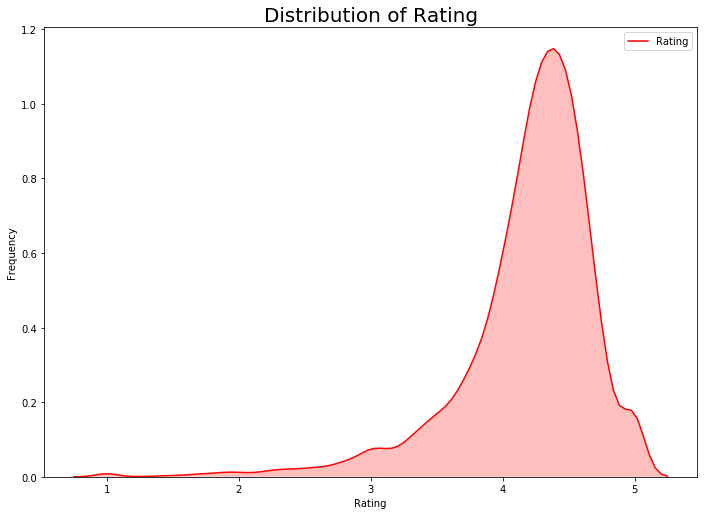

In [69]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

### Category

In [70]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

(33, 'categories')
('\n', array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object))


Text(0.5,1,'Count of app in each category')

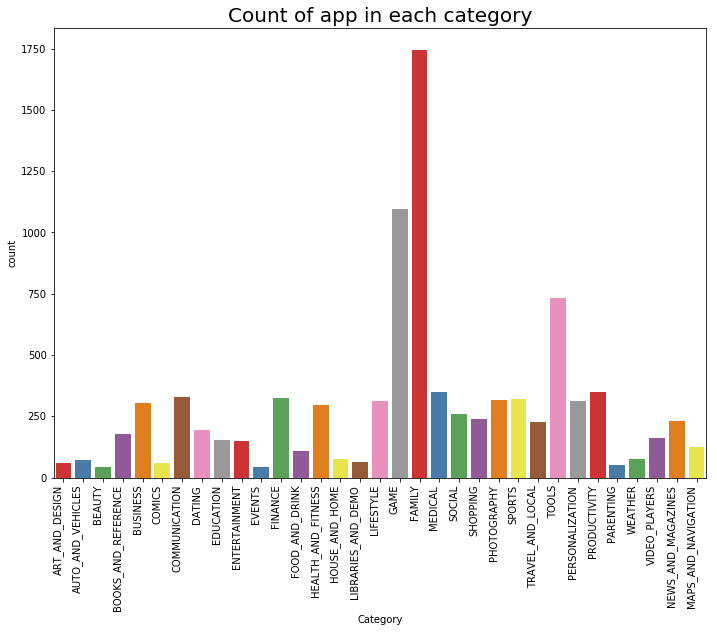

In [71]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

### Reviews

In [72]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [73]:
# convert to int
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

Text(0.5,1,'Distribution of Reveiw')

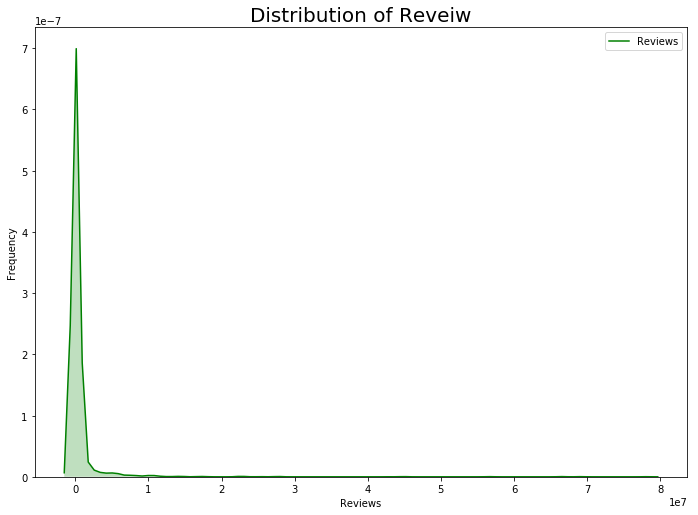

In [74]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

### Size

In [75]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [76]:
len(data[data.Size == 'Varies with device'])

1637

In [77]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [78]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [79]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

Se reemplazan los que varian con el dispositivo con el promedio de cada categoria

<Figure size 720x720 with 0 Axes>

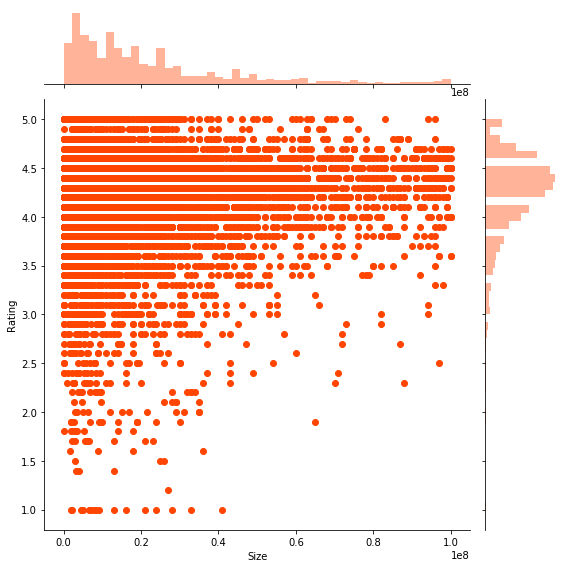

In [80]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, size = 8);

### Installs

In [81]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [82]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [83]:
Sorted_value = sorted(list(data['Installs'].unique()))

In [84]:
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [85]:
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5,1,'Rating VS Installs')

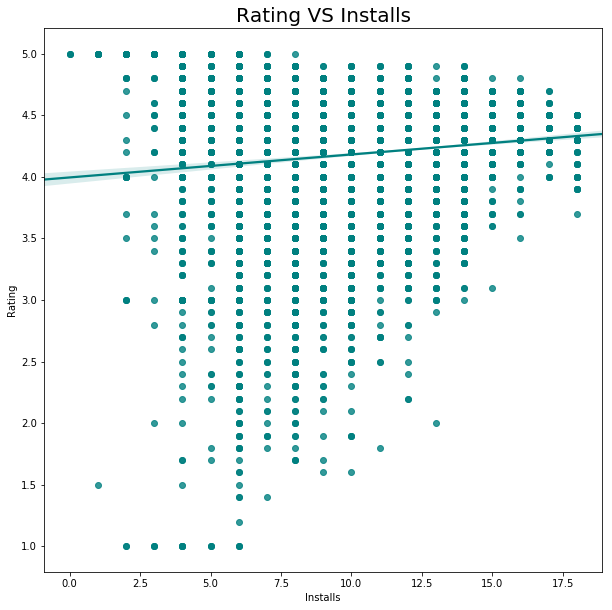

In [86]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

La cantidad de descargas afecta al rating

### Type

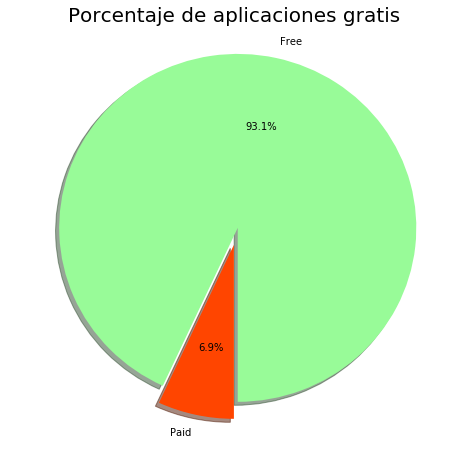

In [87]:
# Data to plot
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Porcentaje de aplicaciones gratis',size = 20)
plt.show()

In [88]:
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

### Price

In [89]:
data['Price'].value_counts().head(30)

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$19.99        5
$11.99        5
$24.99        5
$12.99        5
$8.99         4
$16.99        3
$10.00        3
$5.49         3
$33.99        2
$79.99        2
$1.00         2
$1.70         2
$7.49         2
Name: Price, dtype: int64

In [90]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [91]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5,1,'Scatter plot Rating VS Price')

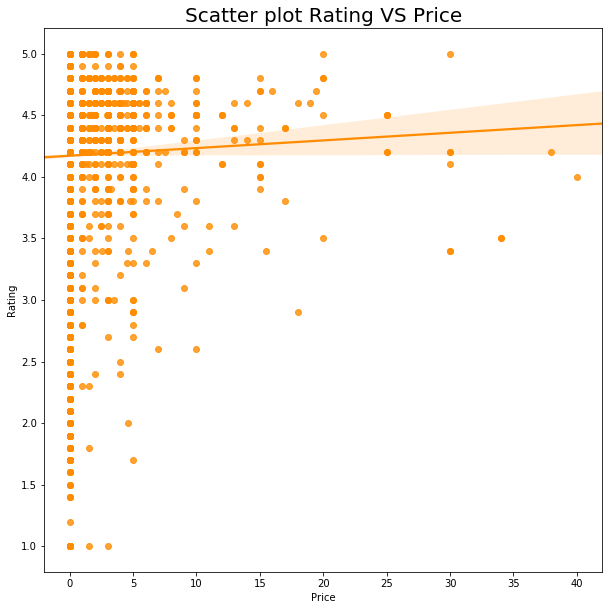

In [107]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[(data['Reviews']<1000000) & (data['Price']<50.0)]);
plt.title('Scatter plot Rating VS Price',size = 20)

In [103]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 FXXXing expensive'

In [104]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 FXXXing expensive,3.923810


## Selección de datos

### Rating

In [27]:
Nos quedamos con las que tengan entre 3 y 5

SyntaxError: invalid syntax (<ipython-input-27-7f5c1044b682>, line 1)